In [1]:
##A1. Evaluate the intraclass spread and interclass distances between the classes in your dataset.
import pandas as pd
import numpy as np

df=pd.read_csv(r"C:\Users\Siva Adithya\Downloads\DCT_withoutduplicate 5.csv")

class1=df[df['LABEL']== 3333]
print(class1)

class2=df[df['LABEL']==3334]
#print(class2)


##Calculate the mean for each class (also called as class centroid)
centroid1_mean=class1.mean(axis=0)
print("Mean of class 1 : \n",centroid1_mean)

centroid2_mean=class2.mean(axis=0)
print("\n\nMean of class 2 : \n",centroid2_mean)

##Calculate spread (standard deviation) for each class
centroid1_std=class1.std(axis=0)
print("\n\nStandard deviation of class 1 : \n",centroid1_std)

centroid2_std=class2.std(axis=0)
print("\n\nStandard deviation of class 2 : \n",centroid2_std)

##Calculate the distance between mean vectors between classes
distance=np.linalg.norm(centroid1_mean-centroid2_mean)
print("\n\nDistance between mean vectors between classes: \n",distance)

              0           1           2            3           4            5  \
0   38687.88477  192.737565  188.366005  2348.285240  188.609889  3359.777672   
1   29532.98806  -54.124623  -22.492524  1648.326090   35.160362  1980.716201   
2   29511.41174  -54.495937  -25.026162  1658.645198   34.814464  2008.855279   
3   29060.40637  -19.466804  -11.668273  1487.612245    7.675333  1788.287900   
4   29039.93589  -19.725400   -9.218980  1497.054471    8.947552  1815.189691   
5   29410.41023   67.356137  -45.541507  1949.319407   -5.674449  1605.760614   
6   29507.38693   61.290254  -38.753147  1833.525551  -16.666341  1529.297183   
7   29464.73632   71.245592  -39.949971  1889.450938  -14.838497  1549.018901   
8   37234.01671  209.505475   77.813801  3457.399277  180.644059  2485.906075   
9   29433.96302   12.541343   12.990857  1515.423639   -5.771299  1804.169894   
10  37785.94420 -178.910884  318.322016  2358.074869  -38.784681  3543.469442   
11  37674.57906 -185.223298 

In [2]:
##A2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("The columns available in the column is \n")
aval_cols=df.columns
print(aval_cols)

feature_name=2
if feature_name in aval_cols:
    data = df[feature_name].dropna()
    hist= np.histogram(data, bins=30, density=True)
   
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
    plt.title('Histogram of Column name 2')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()
 
    mean=data.mean()
    variance=data.var()

    print("Mean of the column :",mean)
    print("Variance of the column : ",variance)

else:
    print(f"Column '{feature_name}' does not exist in the dataset. Please check the column names.")

The columns available in the column is 

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '187', '188', '189', '190', '191', '192', '193', '194', '195', 'LABEL'],
      dtype='object', length=197)
Column '2' does not exist in the dataset. Please check the column names.


In [21]:
##A3 Take any two feature vectors from your dataset. Calculate the Minkwoski distance with r from 1 to 10. 
##Make a plot of the distance and observe the nature of this graph.
import numpy as np
import matplotlib.pyplot as plt

vector_1 = df[2]
vector_2 = df[0]

r_values = range(1, 11)
distances = [np.sum(np.abs(vector_1 - vector_2)**r)**(1/r) for r in r_values]

plt.figure(figsize=(10, 6))
plt.plot(r_values, distances, marker='o')
plt.title('Minkowski Distance between Two Feature Vectors')
plt.xlabel('r value')
plt.ylabel('Minkowski Distance')
plt.grid(True)
plt.show()

KeyError: 2

In [9]:
from sklearn.model_selection import train_test_split

#A4. Divide dataset in your project into two parts – train & test set. To accomplish this, use the train-test_split() function available in SciKit.
df=pd.read_csv(r"C:\Users\Siva Adithya\Downloads\DCT_withoutduplicate 5.csv")


df_binary = df[df['LABEL'].isin([3333, 3334])]

# Split the data into features (X) and labels (y)
X = df_binary.drop('LABEL', axis=1).values
y = df_binary['LABEL'].values

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Display the sizes of the splits
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((62, 196), (27, 196), (62,), (27,))

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#A5 
'''# Train a kNN classifier (k =3) using the training set obtained from above exercise.

knn = KNeighborsClassifier(n_neighbors=3)

# Train the kNN classifier using the training set
knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn.predict(X_test)
#A6
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
accuracy'''

# Initialize and train the kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy of kNN classifier: {accuracy:.4f}")


Accuracy of kNN classifier: 1.0000


In [12]:
#A7
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load your dataset
df=pd.read_csv(r"C:\Users\Siva Adithya\Downloads\DCT_withoutduplicate 5.csv")

# Separate features and labels
X = df.drop(columns=['LABEL'])  # Features (excluding the target column)
y = df['LABEL']  # Target column

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the K-Nearest Neighbors classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=3)

# Train the classifier using the training data
neigh.fit(X_train, y_train)

# Select a test vector (e.g., the first row in the test set)
test_vect = X_test.iloc[0].values.reshape(1, -1)  # Reshape to make it 2D

# Predict the class for the selected test vector
predicted_class = neigh.predict(test_vect)

# Output the predicted class
print("Predicted class for the test vector:", predicted_class[0])

# Compare with the actual class
actual_class = y_test.iloc[0]
print("Actual class for the test vector:", actual_class)

# Optionally, predict and compare for all test vectors
all_predicted_classes = neigh.predict(X_test)
print("\nPredicted classes for all test vectors:\n", all_predicted_classes)
print("\nActual classes for all test vectors:\n", y_test.values)



Predicted class for the test vector: 3366
Actual class for the test vector: 3366

Predicted classes for all test vectors:
 [3366 3353 3356 3346 3333 3379 3384 3378 3381 3376 3349 3376 3377 3450
 3373 3354 3360 3452 3368 3377 3349 3359 3374 3356 3450 3384 3360 3349
 3385 3349 3364 3346 3364 3366 3372 3360 3453 3381 3364 3379 3335 3385
 3376 3335 3451 3453 3376 3353 3353 3383 3376 3335 3371 3452 3384 3378
 3385 3360 3349 3452 3385 3334 3377 3364 3451 3381 3381 3360 3359 3346
 3376 3381 3381 3359 3373 3366 3377 3382 3342 3363 3354 3382 3383 3382
 3374 3379 3334 3376 3349 3367 3452 3384 3376 3381 3378 3342 3352 3451
 3342 3376 3454 3333 3374 3363 3363 3342 3367 3356 3361 3371 3450 3335
 3452 3375 3385 3352 3349 3368 3383 3453 3385 3370 3374 3384 3363 3379
 3376 3376 3365 3346 3378 3359 3361 3385 3373 3334 3377 3372 3371 3368
 3452 3379 3378 3349 3385 3383 3362 3382 3377 3384 3351 3334 3335 3354
 3381 3376 3354 3363 3450 3356 3379 3376 3353 3354 3453 3351 3342 3360
 3353 3381 3385 3376 3376

C:\Users\Siva Adithya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy for k = 1: 0.9089
Accuracy for k = 2: 0.8578
Accuracy for k = 3: 0.8356
Accuracy for k = 4: 0.8156
Accuracy for k = 5: 0.7889
Accuracy for k = 6: 0.7667
Accuracy for k = 7: 0.7333
Accuracy for k = 8: 0.7156
Accuracy for k = 9: 0.7000
Accuracy for k = 10: 0.7000
Accuracy for k = 11: 0.6822


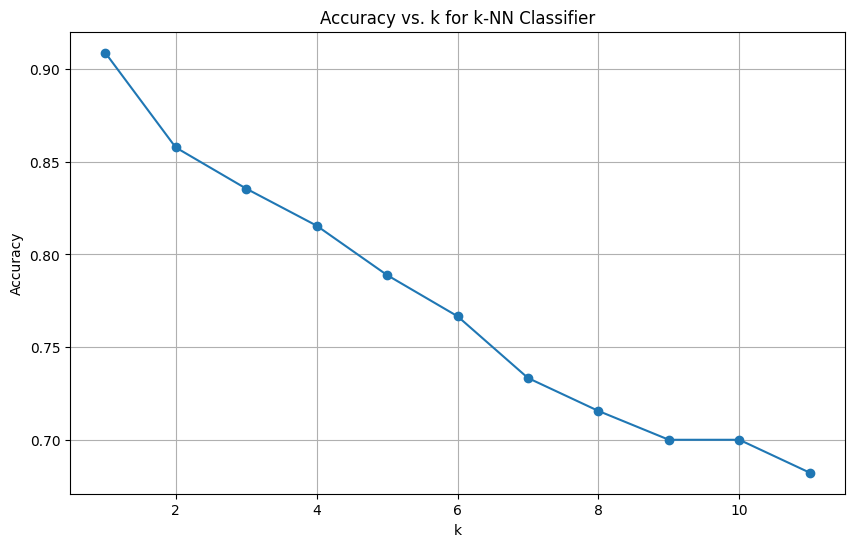


Accuracy for NN (k = 1): 0.9089
Accuracy for k-NN (k = 3): 0.8356


In [13]:
#A8
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load your dataset
df=pd.read_csv(r"C:\Users\Siva Adithya\Downloads\DCT_withoutduplicate 5.csv")

# Separate features and labels
X = df.drop(columns=['LABEL'])  # Features (excluding the target column)
y = df['LABEL']  # Target column

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an empty list to store accuracies
accuracies = []

# Loop over k values from 1 to 11
for k in range(1, 12):
    # Initialize the K-Nearest Neighbors classifier with the current k
    neigh = KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier
    neigh.fit(X_train, y_train)
    
    # Predict the classes for the test set
    y_pred = neigh.predict(X_test)
    
    # Calculate the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # Print the accuracy for the current k
    print(f"Accuracy for k = {k}: {accuracy:.4f}")

# Plotting the accuracy as a function of k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), accuracies, marker='o')
plt.title('Accuracy vs. k for k-NN Classifier')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Compare results for k = 1 and k = 3 explicitly
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train, y_train)
y_pred_1 = knn_1.predict(X_test)
accuracy_1 = accuracy_score(y_test, y_pred_1)
print(f"\nAccuracy for NN (k = 1): {accuracy_1:.4f}")

knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train)
y_pred_3 = knn_3.predict(X_test)
accuracy_3 = accuracy_score(y_test, y_pred_3)
print(f"Accuracy for k-NN (k = 3): {accuracy_3:.4f}")

Confusion Matrix for Training Data:
 [[42  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 40 ...  0  0  0]
 ...
 [ 0  0  0 ... 40  0  2]
 [ 0  0  0 ...  0 41  0]
 [ 0  0  0 ...  0  0 38]]

Confusion Matrix for Test Data:
 [[ 7  0  0 ...  0  0  0]
 [ 0  7  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ... 12  0  1]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  3]]


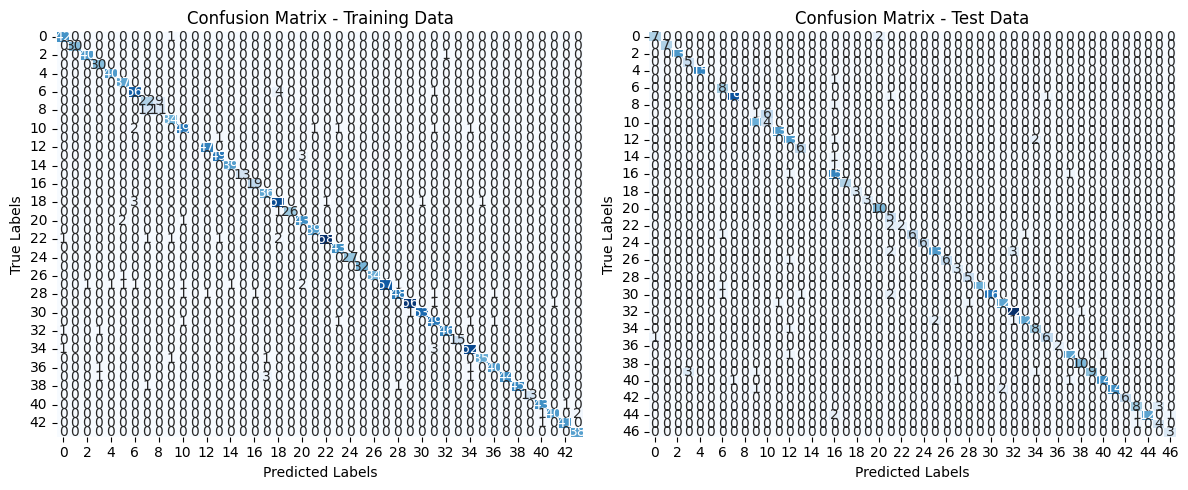


Classification Report for Training Data:

              precision    recall  f1-score   support

        3333       0.93      0.98      0.95        43
        3334       1.00      1.00      1.00        30
        3335       0.98      0.98      0.98        41
        3337       0.91      1.00      0.95        30
        3342       0.98      1.00      0.99        40
        3346       0.90      1.00      0.95        37
        3349       0.90      0.92      0.91        61
        3351       0.61      0.71      0.66        31
        3352       0.55      0.48      0.51        23
        3353       0.92      1.00      0.96        34
        3354       0.92      0.89      0.91        55
        3355       0.00      0.00      0.00         1
        3356       0.98      1.00      0.99        47
        3359       0.96      0.94      0.95        52
        3360       0.97      1.00      0.99        39
        3361       1.00      1.00      1.00        13
        3362       0.95      1.00     

C:\Users\Siva Adithya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Siva Adithya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Siva Adithya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [14]:
#A9
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df=pd.read_csv(r"C:\Users\Siva Adithya\Downloads\DCT_withoutduplicate 5.csv")

# Separate features and labels
X = df.drop(columns=['LABEL'])  # Features (excluding the target column)
y = df['LABEL']  # Target column

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the K-Nearest Neighbors classifier with k = 3 (or any k of your choice)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on both training and test data
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Calculate confusion matrix for training data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix for Training Data:\n", conf_matrix_train)

# Calculate confusion matrix for test data
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix for Test Data:\n", conf_matrix_test)

# Plot confusion matrix for better visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Training Data")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.tight_layout()
plt.show()

# Calculate and print classification report for training data
print("\nClassification Report for Training Data:\n")
print(classification_report(y_train, y_train_pred))

# Calculate and print classification report for test data
print("\nClassification Report for Test Data:\n")
print(classification_report(y_test, y_test_pred))

# Calculate accuracy for training and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")